In [1]:
# !pip3 install pandas
# !pip3 install scikit-learn
# !pip3 install matplotlib
# !pip3 install numpy

In [2]:
# Librairy importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Show data
data = pd.read_csv('winequality-white.csv', sep=";")
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [4]:
# Create 2 arrays
X = data[data.columns[:-1]].values
y = data['quality'].values

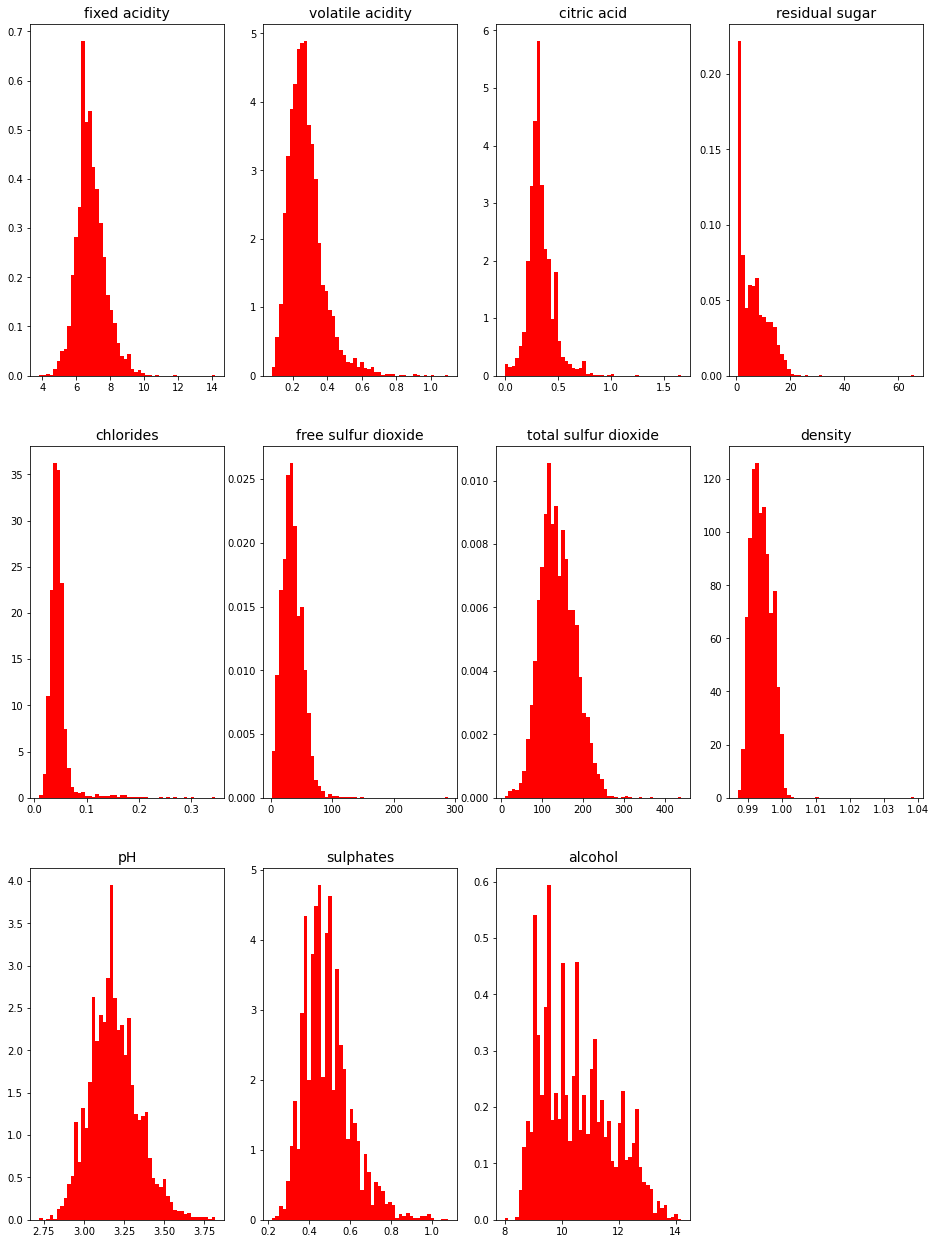

In [6]:
# Create histogramme for any settings
fig = plt.figure(figsize=(16,22))

for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color="red", density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

In [7]:
# To separate good wine and bad wine
y_class = np.where(y<6, 0, 1)

In [8]:
# Create training (70%) and test (30%) sets
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_class, test_size=0.3)

In [11]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

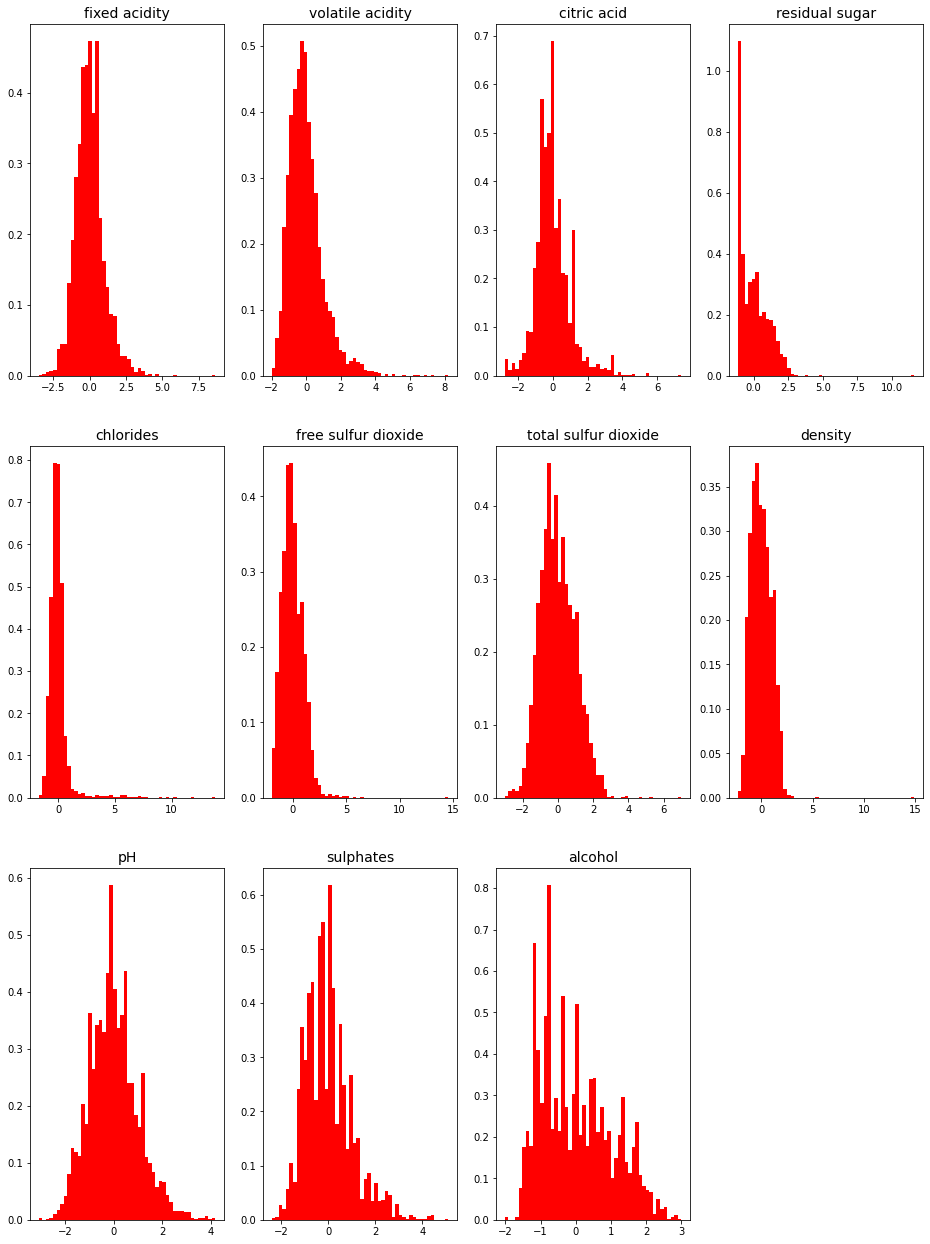

In [13]:
fig = plt.figure(figsize=(16, 22))

for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color="red", density=True, edgecolor="none")
    ax.set_title(data.columns[feat_idx], fontsize=14)

In [21]:
from sklearn import neighbors, metrics

# hyperparameters test
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# score
score = 'accuracy'

# KNN
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Classifier opti
clf.fit(X_train_std, y_train)

# Show hyperparameters opti
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement :")
print(clf.best_params_)

print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_["mean_test_score"], # moyen
        clf.cv_results_["std_test_score"], # écart-type du score
        clf.cv_results_["params"]): # valeur de l'hyperparamètre

      print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement :
{'n_neighbors': 3}
Résultats de la validation croisée :
accuracy = 0.758 (+/-0.024) for {'n_neighbors': 3}
accuracy = 0.753 (+/-0.039) for {'n_neighbors': 5}
accuracy = 0.748 (+/-0.017) for {'n_neighbors': 7}
accuracy = 0.755 (+/-0.006) for {'n_neighbors': 9}
accuracy = 0.756 (+/-0.013) for {'n_neighbors': 11}
accuracy = 0.757 (+/-0.009) for {'n_neighbors': 13}
accuracy = 0.757 (+/-0.008) for {'n_neighbors': 15}


In [23]:
# result in test set
y_pred = clf.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


Sur le jeu de test : 0.778
